In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

# Bibliothèque

In [20]:
class ModelePolynomial:
    def __init__(self, nombre_coefficients: int):
        self.nombre_coefficients = nombre_coefficients
        self._coefs = np.zeros(shape=(nombre_coefficients, ))
        
    def __call__(self, x):
        """Permet d'utiliser un objet de type Modele comme une fonction."""
        return sum(c * x ** k for (k, c) in enumerate(self._coefs))
    
    def erreur(self, xe, ye):
        """Erreur quadratique moyenne."""
        erreurs = (self(xe) - ye) ** 2
        return np.sum(erreurs) / xe.size
    
    def apprend(self, xe, ye):
        """Apprentissage automatique.
        
        Méthode permettant de caler les coefficients internes pour assurer la meilleur prédiction par rapport à un
        échantillon fourni.
        
        xe: entrées pour l'échantillon
        ye: sorties pour l'échantillon
        """
        def a_minimiser(cs):
            self._coefs = cs
            return self.erreur(xe, ye)
            
            
        resultat = minimize(fun=a_minimiser, x0=self._coefs)
        if not resultat.success:
            raise ValueError("Impossible d'entrainer le modèle")
        self._coefs = resultat.x

In [89]:
class ModeleTrigo:
    def __init__(self, nombre_coefficients: int):
        self.nombre_coefficients = nombre_coefficients
        self._coefs = np.zeros(shape=(nombre_coefficients, ))
        
    def __call__(self, x):
        """Permet d'utiliser un objet de type Modele comme une fonction."""
        return sum(c * np.cos(2 * np.pi * k * x / L) for (k, c) in enumerate(self._coefs))
    
    def erreur(self, xe, ye):
        """Erreur quadratique moyenne."""
        erreurs = (self(xe) - ye) ** 2
        return np.sum(erreurs) / xe.size
    
    def apprend(self, xe, ye):
        """Apprentissage automatique.
        
        Méthode permettant de caler les coefficients internes pour assurer la meilleur prédiction par rapport à un
        échantillon fourni.
        
        xe: entrées pour l'échantillon
        ye: sorties pour l'échantillon
        """
        def a_minimiser(cs):
            self._coefs = cs
            return self.erreur(xe, ye)
            erreurs = (self(xe) - ye) ** 2
            return np.sum(erreurs) / xe.size
            
        resultat = minimize(fun=a_minimiser, x0=self._coefs)
        if not resultat.success:
            raise ValueError("Impossible d'entrainer le modèle")
        self._coefs = resultat.x

**REMARQUE** 
- `nombre_coefficients` est décidé par l'utilisateur du modèle, c'est ce qu'on appelle un *hyperparamètre*.
- `_coefs` au contraire sera déterminé algorithmiquement, c'est ce qu'on appelle les *paramètres* du modèle, l'utilisateur n'est pas censé les toucher directement.
- On voit que seule la méthode `__call__` diffère entre les modèles. On pourrait créer une interface abstraite pour éviter la duplication.

# Expérience

In [90]:
L = 10
EPSILON = 0.1
TAILLE_ECHANTILLON = 20

def objectif(x):
    return np.exp(-x / 10) * np.sin(np.pi * x)

XE = np.linspace(0, L, TAILLE_ECHANTILLON)
YE = objectif(xe) + EPSILON * np.random.randn(TAILLE_ECHANTILLON)

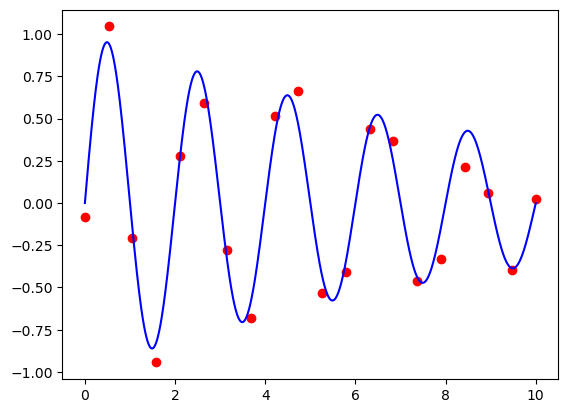

In [91]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue")
plt.scatter(XE, YE, color="red")

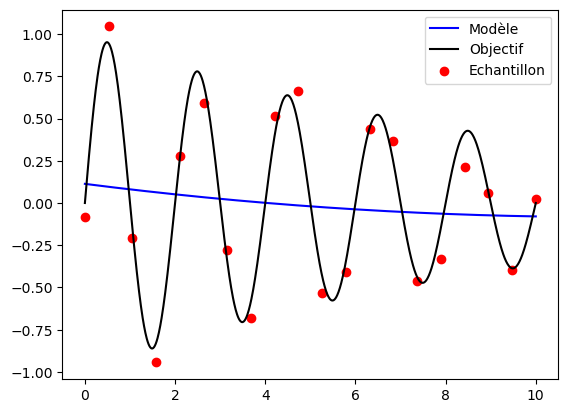

In [92]:
m = ModelePolynomial(nombre_coefficients=3)
m.apprend(xe=XE, ye=YE)

xs = np.linspace(0, L, 1000)
ys = objectif(xs)
zs = m(xs)
plt.plot(xs, zs, color="blue", label="Modèle")
plt.plot(xs, ys, color="black", label="Objectif")
plt.scatter(XE, YE, color="red", label="Echantillon")
plt.legend()

In [93]:
m = ModelePolynomial(nombre_coefficients=5)
m.apprend(xe=XE, ye=YE)

xs = np.linspace(0, L, 1000)
ys = objectif(xs)
zs = m(xs)
plt.plot(xs, zs, color="blue", label="Modèle")
plt.plot(xs, ys, color="black", label="Objectif")
plt.scatter(XE, YE, color="red", label="Echantillon")
plt.legend()

ValueError: Impossible d'entrainer le modèle

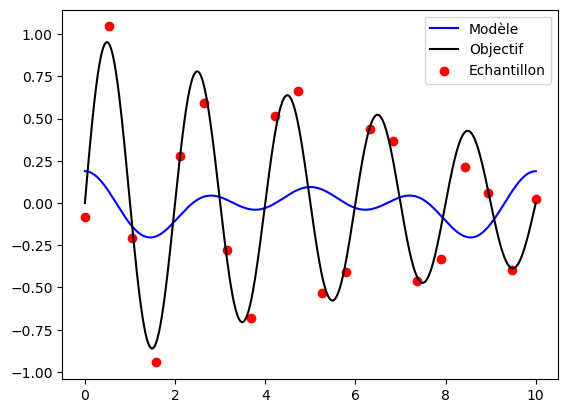

In [94]:
m = ModeleTrigo(nombre_coefficients=5)
m.apprend(xe=XE, ye=YE)

xs = np.linspace(0, L, 1000)
ys = objectif(xs)
zs = m(xs)
plt.plot(xs, zs, color="blue", label="Modèle")
plt.plot(xs, ys, color="black", label="Objectif")
plt.scatter(XE, YE, color="red", label="Echantillon")
plt.legend()

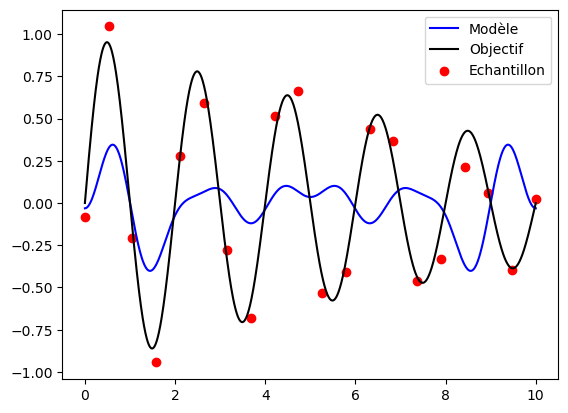

In [95]:
m = ModeleTrigo(nombre_coefficients=10)
m.apprend(xe=XE, ye=YE)

xs = np.linspace(0, L, 1000)
ys = objectif(xs)
zs = m(xs)
plt.plot(xs, zs, color="blue", label="Modèle")
plt.plot(xs, ys, color="black", label="Objectif")
plt.scatter(XE, YE, color="red", label="Echantillon")
plt.legend()

## Exercice

Recréer les expériences de la séance précédente montrant le surapprentissage en fonctions
- de la taille de l'échantillon
- du nombre de paramètres du modèle

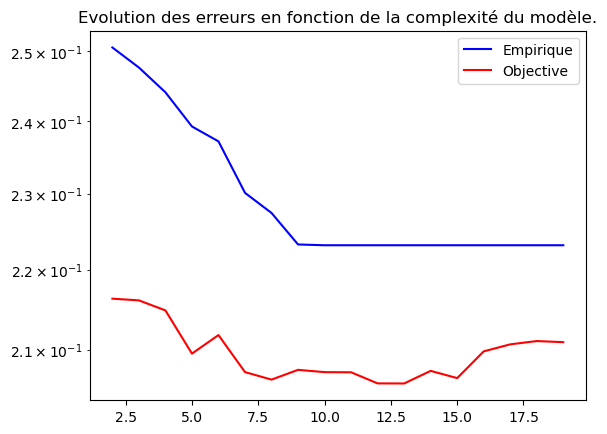

In [96]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
nbs = [nb for nb in range(2, 20)]
erreurs_empirique = list()
erreurs_objective = list()
for nb in nbs:
    m = ModeleTrigo(nombre_coefficients=nb)
    m.apprend(XE, YE)
    erreurs_empirique.append(m.erreur(XE, YE))
    erreurs_objective.append(m.erreur(xs, ys))
    
plt.semilogy(nbs, erreurs_empirique, label="Empirique", color="blue")
plt.semilogy(nbs, erreurs_objective, label="Objective", color="red")
plt.title("Evolution des erreurs en fonction de la complexité du modèle.")
plt.legend()

**CONCLUSION** après une phase où les deux types d'erreur diminuent, l'erreur objective commence à augmenter.
Pour un échantillon de taille 20, on voit qu'il est contre productif d'avoir plus que 7 paramètres.

**OBJECTIF** Quelle méthodologie va permettre de détecter juste avec l'échantillon, la quantité optimale de paramètres.

**SOLUTION** on va séparer les données de l'échantillon en deux, une partie servira à l'entrainement, une partie servira à produire, après l'entrainement une erreur objective.

In [97]:
def train_test_split(xe, ye, proportion=0.6):
    """Découpe l'échantillon entre une partie apprentissage et une partie contrôle."""
    xa, xc, ya, yc = list(), list(), list(), list()
    for x, y in zip(xe, ye):
        if np.random.rand() < proportion:
            xa.append(x)
            ya.append(y)
        else:
            xc.append(x)
            yc.append(y)
    return np.array(xa), np.array(xc), np.array(ya), np.array(yc)

In [98]:
xa, xc, ya, yc = train_test_split(XE, YE)

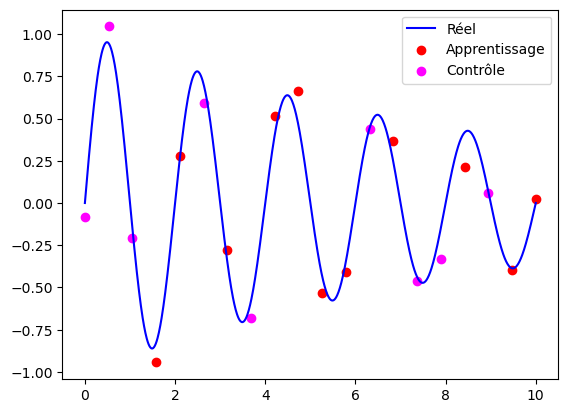

In [99]:
xs = np.linspace(0, L, 1000)
ys = objectif(xs)
plt.plot(xs, ys, color="blue", label="Réel")
plt.scatter(xa, ya, color="red", label="Apprentissage")
plt.scatter(xc, yc, color="magenta", label="Contrôle")
plt.legend()

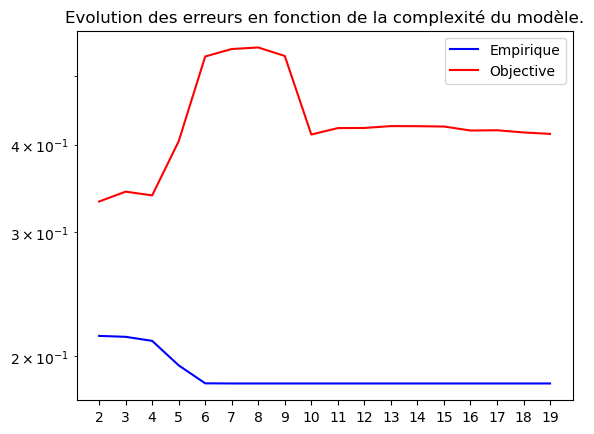

In [100]:
nbs = [nb for nb in range(2, 20)]
erreurs_empirique = list()
erreurs_objective = list()
for nb in nbs:
    m = ModeleTrigo(nombre_coefficients=nb)
    m.apprend(xa, ya)
    erreurs_empirique.append(m.erreur(xa, ya))
    erreurs_objective.append(m.erreur(xc, yc))
    
plt.xticks(nbs)
plt.semilogy(nbs, erreurs_empirique, label="Empirique", color="blue")
plt.semilogy(nbs, erreurs_objective, label="Objective", color="red")
plt.title("Evolution des erreurs en fonction de la complexité du modèle.")
plt.legend()

**REMARQUE** on a bien réussi à détecter le surapprentissage avec `train_test_split`

**ATTENTION** l'idée est qu'on avait 18 modèles en concurrence, on voulait sélectionner le meilleur par exemple avec l'erreur empirique, et vérifier avant d'utiliser ce modèle qu'il n'est pas en surapprentissage.

En pratique ici, le meilleur modèle pour l'erreur empirique correspond à 15 paramètres.
Mais ce modèle est en surapprentissage quand on regarde les deux erreurs.

On pourrait être tenter d'utiliser l'erreur empirique et l'erreur objective pour sélectionner le meilleur modèle.
Mais si on fait cela on ne peut plus vérifier s'il y a un surapprentissage.
D'une certaine façon la sélection d'un modèle, est un méta-apprentissage, on a donc utilise la partie contrôle de l'échantillon pour faire de l'apprentissage, elle ne peut plus servir de contrôle pour le surapprentissage.

L'idée est donc de redécouper la partie apprentissage, en une partie servant effectivement pour l'apprentissage et un partie servant pour la sélection du meilleur modèle.
On teste ensuite ce meilleur modèle pour le surapprentissage via la partie contrôle de l'échantillon.

In [101]:
xa, xc, ya, yc = train_test_split(XE, YE, proportion=0.7)
xa, xs, ya, ys = train_test_split(xa, ya, proportion=0.8)

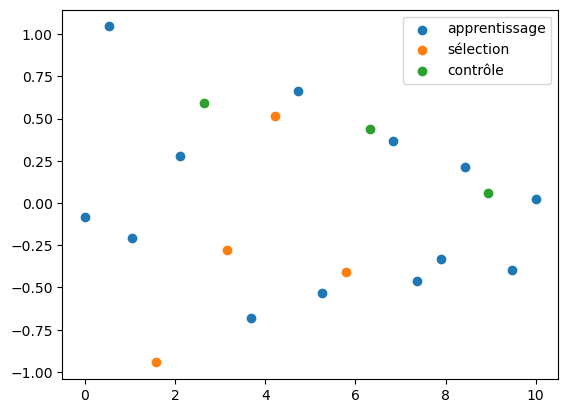

In [102]:
plt.scatter(xa, ya, label="apprentissage")
plt.scatter(xs, ys, label="sélection")
plt.scatter(xc, yc, label="contrôle")
plt.legend()

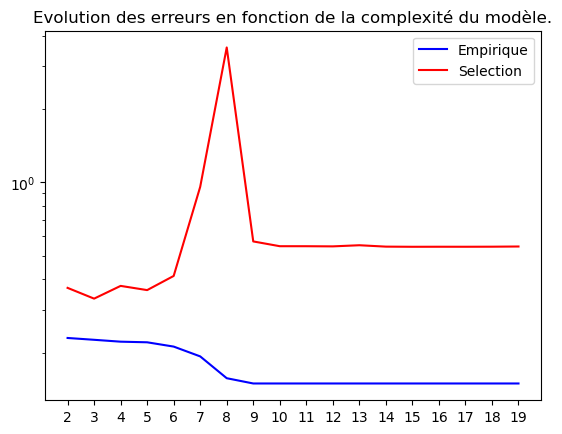

In [103]:
nbs = [nb for nb in range(2, 20)]
erreurs_empirique = list()
erreurs_selective = list()
for nb in nbs:
    m = ModeleTrigo(nombre_coefficients=nb)
    m.apprend(xa, ya)
    erreurs_empirique.append(m.erreur(xa, ya))
    erreurs_selective.append(m.erreur(xs, ys))
    
plt.xticks(nbs)
plt.semilogy(nbs, erreurs_empirique, label="Empirique", color="blue")
plt.semilogy(nbs, erreurs_selective, label="Selection", color="red")
plt.title("Evolution des erreurs en fonction de la complexité du modèle.")
plt.legend()

Le meilleur modèle a 5 coefficients internes.

In [104]:
m = ModeleTrigo(nombre_coefficients=5)
m.apprend(xa, ya)
print(f"""
Erreur Empirique: {m.erreur(xa, ya)}
Erreur Contrôle: {m.erreur(xc, yc)}
"""
     )


Erreur Empirique: 0.22057665311428545
Erreur Contrôle: 0.3365408956818389



**REMARQUE** l'échantillon réduit trop en faisant cette manipulation.

## Exercice

Reproduire la procédure complète d'entrainement, en faisant varier la taille de l'échantillon.

In [112]:
def experience(taille_echantillon: int, taille_erreur: float):
    # Création de l'échantillon
    xe = np.linspace(0, L, taille_echantillon)
    ye = objectif(xe) + taille_erreur * np.random.randn(taille_echantillon)
    
    # Séparation de l'échantillon en diverses parties
    xa, xc, ya, yc = train_test_split(XE, YE, proportion=0.7)
    xa, xs, ya, ys = train_test_split(xa, ya, proportion=0.8)
    
    # Sélection du meilleur modèle
    nbs = [nb for nb in range(2, taille_echantillon)]
    erreurs_empirique = list()
    erreurs_selective = list()
    for nb in nbs:
        m = ModeleTrigo(nombre_coefficients=nb)
        m.apprend(xa, ya)
        erreurs_empirique.append(m.erreur(xa, ya))
        erreurs_selective.append(m.erreur(xs, ys))
    
    im, em = 0, erreurs_selective[0]
    for i, e in enumerate(erreurs_selective):
        if em > e:
            im, em = i, e
            
    # Gestion du meilleur modèle
    meilleur_modele = ModeleTrigo(nbs[im])
    meilleur_modele.apprend(xa, ya)
    print(f"""
Nombre de paramètres: {nbs[im]}
Erreur Empirique: {meilleur_modele.erreur(xa, ya)}
Erreur Selective: {meilleur_modele.erreur(xs, ys)}
Erreur Contrôle: {meilleur_modele.erreur(xc, yc)}
    """
         )
    return meilleur_modele
    
    


Nombre de paramètres: 2
Erreur Empirique: 0.10929234017088484
Erreur Selective: 0.12289864358405243
Erreur Contrôle: 0.6800823748725414
    


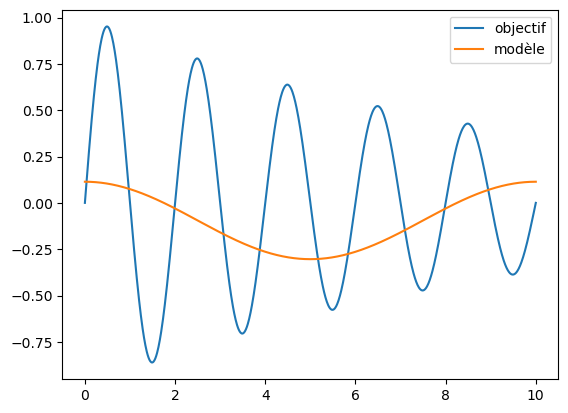

In [116]:
mm = experience(taille_echantillon=30, taille_erreur=0.1)

xs = np.linspace(0, 10, 1000)
ys = objectif(xs)
zs = mm(xs)
plt.plot(xs, ys, label="objectif")
plt.plot(xs, zs, label="modèle")
plt.legend()


Nombre de paramètres: 11
Erreur Empirique: 0.11101123520834577
Erreur Selective: 0.02497571573095697
Erreur Contrôle: 0.9545276576550207
    


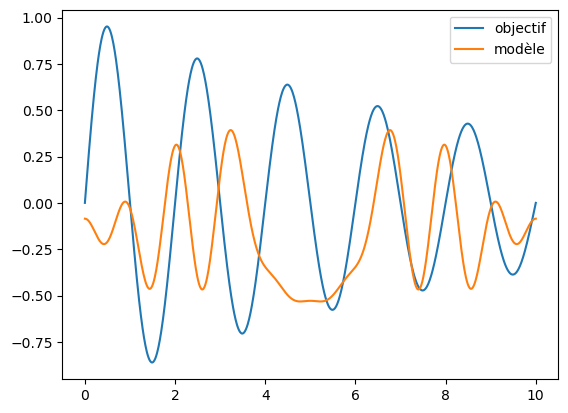

In [117]:
mm = experience(taille_echantillon=50, taille_erreur=0.1)
xs = np.linspace(0, 10, 1000)
ys = objectif(xs)
zs = mm(xs)
plt.plot(xs, ys, label="objectif")
plt.plot(xs, zs, label="modèle")
plt.legend()


Nombre de paramètres: 2
Erreur Empirique: 0.13162628391888193
Erreur Selective: 0.6901269506396833
Erreur Contrôle: 0.5630295196580272
    


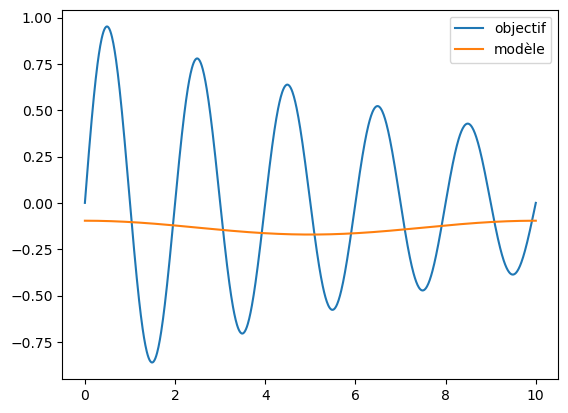

In [118]:
mm = experience(taille_echantillon=100, taille_erreur=0.1)
xs = np.linspace(0, 10, 1000)
ys = objectif(xs)
zs = mm(xs)
plt.plot(xs, ys, label="objectif")
plt.plot(xs, zs, label="modèle")
plt.legend()